### Shivanka Priyashan
### Index No : 190476V

#### Question 01

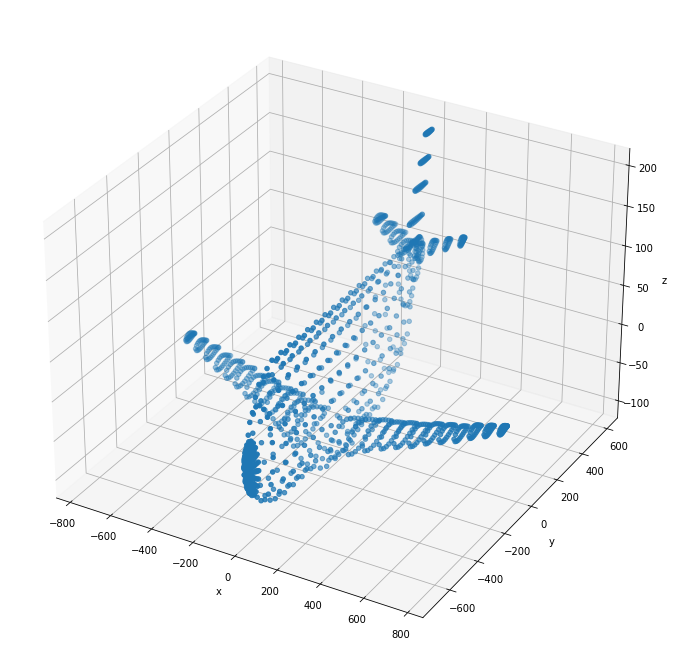

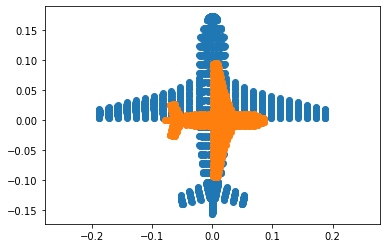

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData,PlyElement

pcd = PlyData.read("airplane.ply")
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)   

ones = np.ones((1, points.shape[1]))
X = np.concatenate((points,ones),axis=0)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t) , axis=1)

R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t) , axis=1)

x1 = P1 @ X
x2 = P2 @ X
x1 = x1 / x1[2, :]
x2 = x2 / x2[2, :]

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.scatter(x1[0,:], x1[1, :])
ax.scatter(x2[0,:], x2[1, :])
ax.axis("equal")
plt.show()

#### Question 03

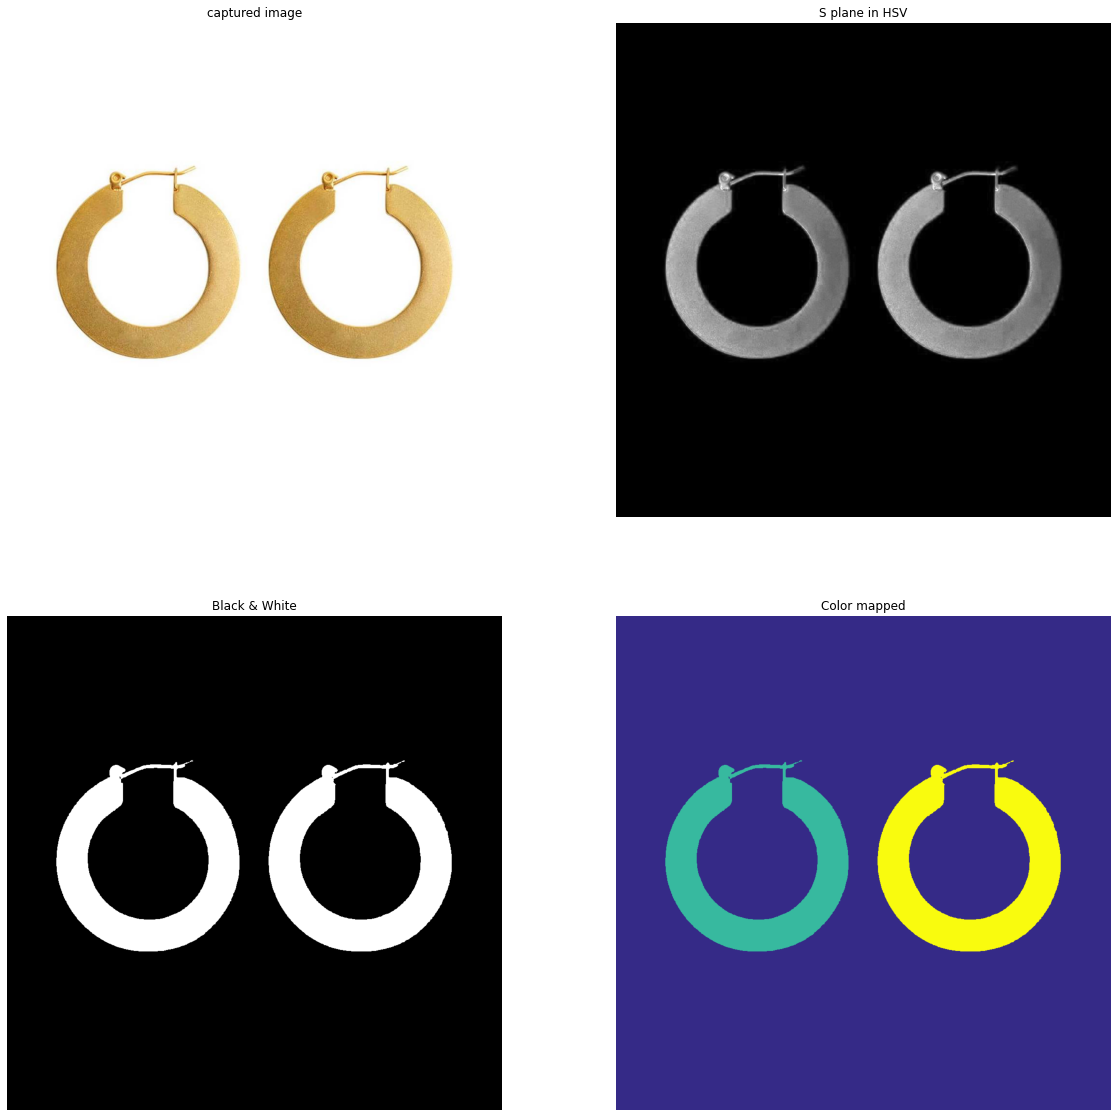

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"earrings.jpg", cv.IMREAD_COLOR)
assert img is not None

hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
th , bw = cv.threshold(hsv[: ,:, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats , centroids = cv.connectedComponentsWithStats(bw)
cmaped = cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)

Z = 720
f = 8
for i,s in enumerate(stats):
    if (i !=0):
        mm = s[4]*(2.2e-3)**2*(Z**2)/(f**2)
fig, ax = plt.subplots(2,2,figsize=(20,20))

ax[0,0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0,0].axis('off')
ax[0,0].set_title("captured image")

ax[0,1].imshow(cv.cvtColor(hsv[: ,:, 1],cv.COLOR_BGR2RGB))
ax[0,1].axis('off')
ax[0,1].set_title("S plane in HSV")

ax[1,0].imshow(cv.cvtColor(bw,cv.COLOR_BGR2RGB))
ax[1,0].axis('off')
ax[1,0].set_title("Black & White")

ax[1,1].imshow(cv.cvtColor(cmaped,cv.COLOR_BGR2RGB))
ax[1,1].axis('off')
ax[1,1].set_title("Color mapped")

plt.show()